
# Méthodes non paramétriques


L'objectif de cet exercice est de mettre en pratique les notions d'estimation de densité de probabilité et de classification utilisant des modèles non paramétriques.

Soit ${\bf x}_0$ un vecteur de caractéristiques et ${\cal D}({\bf x}_0)$ un domaine comprenant ce vecteur ${\bf x}_0$, nous voulons construire un estimateur $\hat{P}({\bf x}_0|c)$ :
$$
\hat{P}({\bf x}_0|c) \approx \cfrac{\frac{k}{n}}{V({\cal D}({\bf x}_0))}
$$
$k$ est le nombre d'échantillons qui appartiennent au domaine ${\cal D}$ et $n$ est le nombre total d'échantillons.
Comme nous l'avons vu en classe, il existe deux principales catégories d'approches de modélisation non paramétriques :
+  lier $V({\cal D}_n({\bf x}_0))$ à n : il s'agit des modèles basés sur des noyaux (Kernel Density Estimation également appelés fenêtres de Parzen)
+ lier $k_n$ en fonction de $n$ et ajuster le domaine  $V({\cal D}_n({\bf x}_0))$ de manière à ce que $k$ échantillons appartiennent à ${\cal D}_n({\bf x}_0)$ : c'est la méthode des $k$ plus proches voisins (KNN)



# 1. Estimation de densité de probabilité par noyau


## 1.a)  Estimation de vraisemblance par KDE


Nous allons ici estimer la fonction de densité de probabilité associée aux 2 classes de fleurs utilisées lors de la première session, en utilisant la méthode KDE. 
L'estimateur de densité par noyau (KDE) est défini par :

$$
\hat{P}_n({\bf x}_0|c)=\cfrac{1}{n}
\sum_{i=1}^n \cfrac{1}{V({\cal D}_n({\bf x}_0))}\  \varphi\left( 
\cfrac{{\bf x}_0 - {\bf x}_i}{h_n}\right)
$$
La fonction $\varphi$ est le **noyau de l'estimateur**.

Nous allons récupérer les caractéristiques comme dans l'exercice précédent et utiliser la méthode KDE pour estimer les fonctions de densité de probabilité.

In [1]:
#import des bibliothèques python nécessaires :
import numpy as np

#plot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Pour avoir un plot 3D interactif
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

# Gaussienne et KDD
from scipy.stats import multivariate_normal
from sklearn.neighbors import KernelDensity

# pour manipuler les accès aux répertoires
import os

# Pour le traitement d'images et la vision par ordinateur
import cv2

In [2]:
# Choix du dataset
training_images_path ='images/dataset1/app/'
testing_images_path ='images/dataset1/test/'

In [3]:
# Fonction d'extraction de caractéristiques d'une image
def getfeature(filename):
    im = cv2.imread(filename)
    imrgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    R = imrgb[:,:,0]
    G = imrgb[:,:,1]
    B = imrgb[:,:,2]    
    In= R+G+B # Calcul de l'intensité des pixels
    mIn = np.max((In.flatten())) # Calcul de l'intensité maximale
    # normalisation
    Rn = R/mIn
    Gn = G/mIn
    Bn = B/mIn    
    # Calcul de la moyenne de chaque composante
    X = [np.mean(Rn.flatten()),np.mean(Gn.flatten()),np.mean(Bn.flatten())]    
    return X

# Fonction d'extraction de caractéristiques pour toutes les images d'un répertoire de la classe cl
def getfeatures (path, cl):
    X = []
    scl = 'c'+str(cl)
    for i in os.listdir(path):
        #print("processing file ",i)
        if os.path.isfile(os.path.join(path,i)) and scl in i:
            X.append(getfeature(path+i))
    print("Calcul des caractéristiques de la classe", cl, "terminé")
    return np.asarray(X)

### A Faire :

+ Compléter ici le calcul des caractéristiques (comme dans l'exercice précédent)
+ le modèle KDE implémenté dans la bibliothèque python `sklearn` par la fonction:`sklearn.neighbors.KernelDensity` Complétez le code qui applique la méthode KDE et affiche la densité. Les options `kernel='gaussian'` et `bandwidth=0.5` seront utilisées dans un premier temps.
+ L'option "kernel" définit le noyau à utiliser. Les noyaux possibles sont ['gaussian'|'tophat'|'epanechnikov'|'exponential'|'linear'|'cosine']. La valeur par défaut est le noyau Gaussien. Sélectionnez au moins 3 noyaux, donnez leur expression et comparez les.
+ L'option "bandwidth" détermine la "bande passante" du noyau. Essayez plusieurs valeurs entre $0.01$ et $5$ et concluez sur l'influence de ce paramètre.
    

Calcul des caractéristiques de la classe 1 terminé
Calcul des caractéristiques de la classe 2 terminé
Calcul des caractéristiques de la classe 1 terminé
Calcul des caractéristiques de la classe 2 terminé


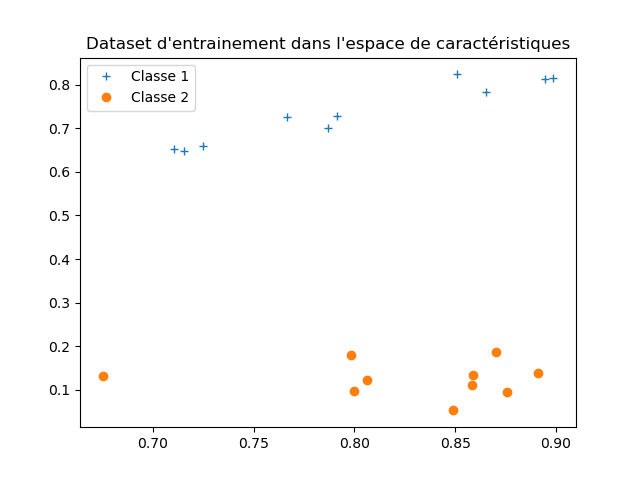

In [4]:
# A COMPLETER
# Calcul des caractéristiques pour les images de la base d'entrainement :
X1 = getfeatures(training_images_path, 1)[:,:2]
X2 = getfeatures(training_images_path, 2)[:,:2]

# Calcul des caractéristiques pour les images de la base de test :
Xtest1 = getfeatures(testing_images_path, 1)[:,:2]
Xtest2 = getfeatures(testing_images_path, 2)[:,:2]

# Affichage
plt.figure()
plt.plot(X1[:,0],X1[:,1],'+',label='Classe 1')
plt.plot(X2[:,0],X2[:,1],'o',label = 'Classe 2')
plt.legend()
plt.title('Dataset d\'entrainement dans l\'espace de caractéristiques')
plt.show()

In [5]:
# COMPLETER
print(X1.shape)
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X1)
kde2 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X2)

(10, 2)


In [6]:
# plot KDE estimation 
def plotKDE(kde, Xdata, x_min=-1, x_max=1, y_min=-1, y_max=1, res=300, title = 'KDE distribution'):
    #Create grid and multivariate KDE estimation
    x = np.linspace(x_min,x_max,res)
    y = np.linspace(y_min,y_max,res)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    
    # Distribution de probabilités
    log_dens = kde.score_samples(np.transpose(np.array([X.flatten(),Y.flatten()])))
    log_dens = log_dens.reshape(X.shape[0],X.shape[1])
    
    # Affichage 3D 
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot_surface(X, Y, np.exp(log_dens),cmap='viridis',linewidth=0)
    ax.scatter(Xdata[:,0],Xdata[:,1])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title(title)

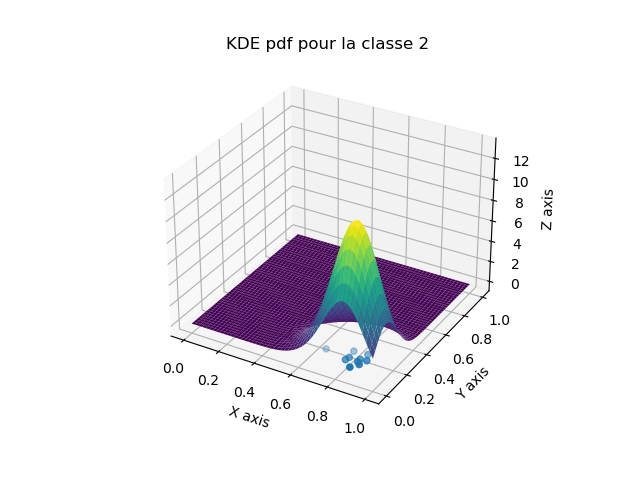

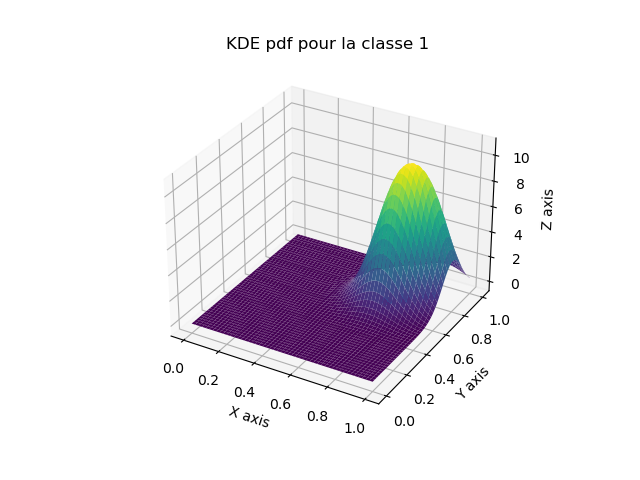

In [7]:
# display
#plt.figure()
plotKDE(kde1, X1,x_min=0,x_max=1, y_min=0, y_max=1, title='KDE pdf pour la classe 1')
#plt.plot
plotKDE(kde2, X2,x_min=0,x_max=1, y_min=0, y_max=1, title='KDE pdf pour la classe 2')
plt.show()

## 1.b)  Classification bayésienne avec KDE

Puisque le modèle KDE peut estimer une fonction de vraisemblance, il peut être utilisé dans la règle de Bayes pour estimer une distribution à postériori dans un problème de classification. On suppose ici que les probabilités à priori sont égales pour les deux classes.
+ Complétez la fonction ci-dessous qui affiche la distribution de probabilité à postériori. Vous pourrez utiliser la fonction ```score_sample```
+ Affichez et analysez la figure de les distributions KDE pour ```bandwidth=0.25```.
+ Changez la bande passante de l'estimateur pour $0.1$, $0.5$ puis $1$ et comparez les distributions et fonction de décision résultantes.


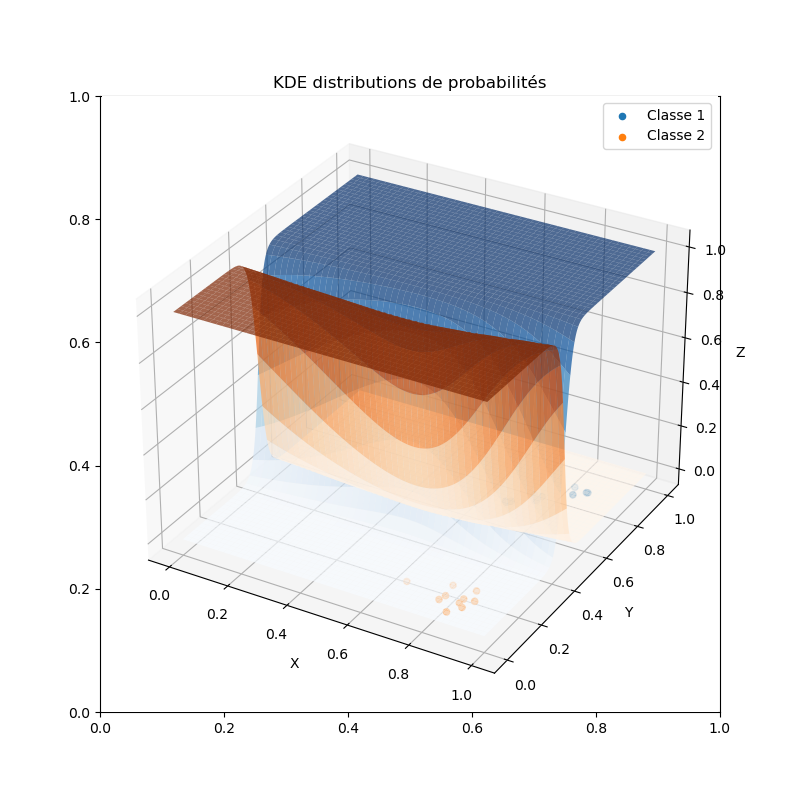

In [8]:
# Affichage des distributions de probabilités
def plotKDEdistribution(kde1,kde2, Xdata1, Xdata2,x_min=-1, x_max=1, y_min=-1, y_max=1, res=300\
             , title = 'KDE distributions de probabilités'):
    #Create grid and multivariate KDE estimation
    x = np.linspace(x_min,x_max,res)
    y = np.linspace(y_min,y_max,res)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    
    # Distributions de probabilités
    #COMPLETER
    log_dens1 = kde1.score_samples(np.transpose(np.array([X.flatten(),Y.flatten()])))
    log_dens2 = kde2.score_samples(np.transpose(np.array([X.flatten(),Y.flatten()])))
    log_dens1 = log_dens1.reshape(X.shape[0],X.shape[1])
    log_dens2 = log_dens2.reshape(X.shape[0],X.shape[1])
    p_post1 = np.exp(log_dens1) / (np.exp(log_dens1)+np.exp(log_dens2))
    p_post2 = np.exp(log_dens2) / (np.exp(log_dens1)+np.exp(log_dens2))

    
    # Affichage 3D   
    fig, ax = plt.subplots(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, p_post1, cmap='Blues',linewidth=0,vmin=0,vmax=1, alpha = 0.7)
    ax.plot_surface(X, Y, p_post2, cmap='Oranges',linewidth=0,vmin=0,vmax=1, alpha = 0.7)
    ax.scatter(Xdata1[:,0],Xdata1[:,1], label='Classe 1')
    ax.scatter(Xdata2[:,0],Xdata2[:,1], label='Classe 2') 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title(title)
    
# Appel de la fonction    
plotKDEdistribution(kde1,kde2,X1,X2,x_min=0, y_min=0)

In [9]:
# plot KDE based decision function 
def plotKDEdecision(kde1,kde2, Xdata1, Xdata2,x_min=-1, x_max=1, y_min=-1, y_max=1, res=300, title = 'Frontière de décision'):
    #Create grid and multivariate KDE estimation
    x = np.linspace(x_min,x_max,res)
    y = np.linspace(y_min,y_max,res)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    
    #COMPLETER
    log_dens1 = kde1.score_samples(np.transpose(np.array([X.flatten(),Y.flatten()])))
    log_dens2 = kde2.score_samples(np.transpose(np.array([X.flatten(),Y.flatten()])))
    log_dens1 = log_dens1.reshape(X.shape[0],X.shape[1])
    log_dens2 = log_dens2.reshape(X.shape[0],X.shape[1])
    p_post1 = np.exp(log_dens1) / (np.exp(log_dens1)+np.exp(log_dens2))
    p_post2 = np.exp(log_dens2) / (np.exp(log_dens1)+np.exp(log_dens2))
    Z=p_post1-p_post2
    
    #Affichage
    fig, ax = plt.subplots(figsize=(8,8))   
    ax.scatter(Xdata1[:,0],Xdata1[:,1],c='g', label='Classe 1')
    ax.scatter(Xdata2[:,0],Xdata2[:,1],c='b', label='Classe 2') 
    
    ax.contourf(X, Y, Z, levels=[-10., 0, 10.], colors = ['lightsteelblue','mintcream'], alpha=.4)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.legend()
    ax.set_title(title)

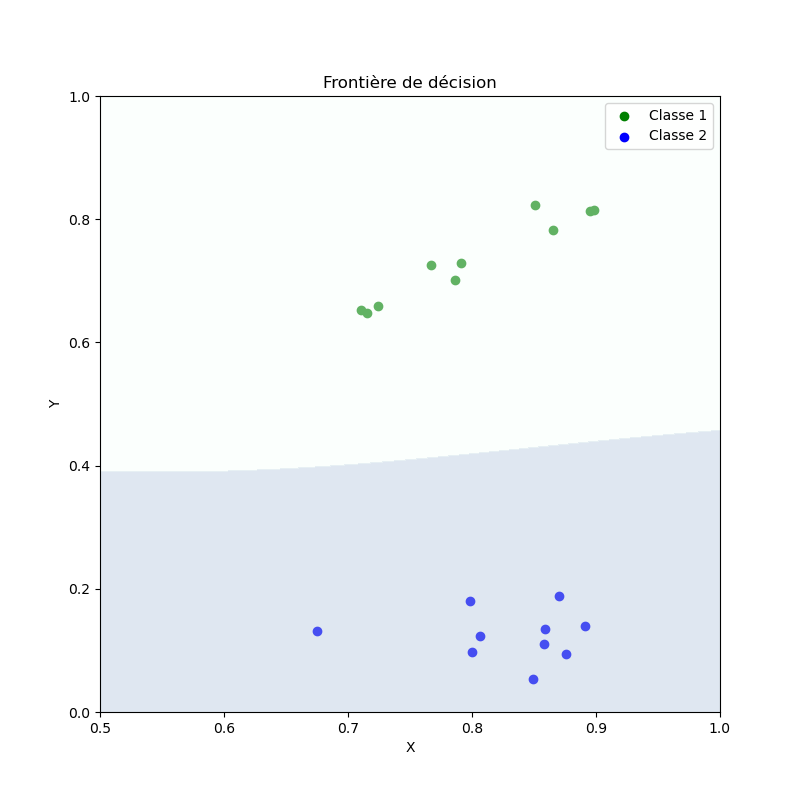

In [10]:
# Appel de la fonction  
plotKDEdecision(kde1,kde2,X1,X2,x_min=0.5, y_min=0)

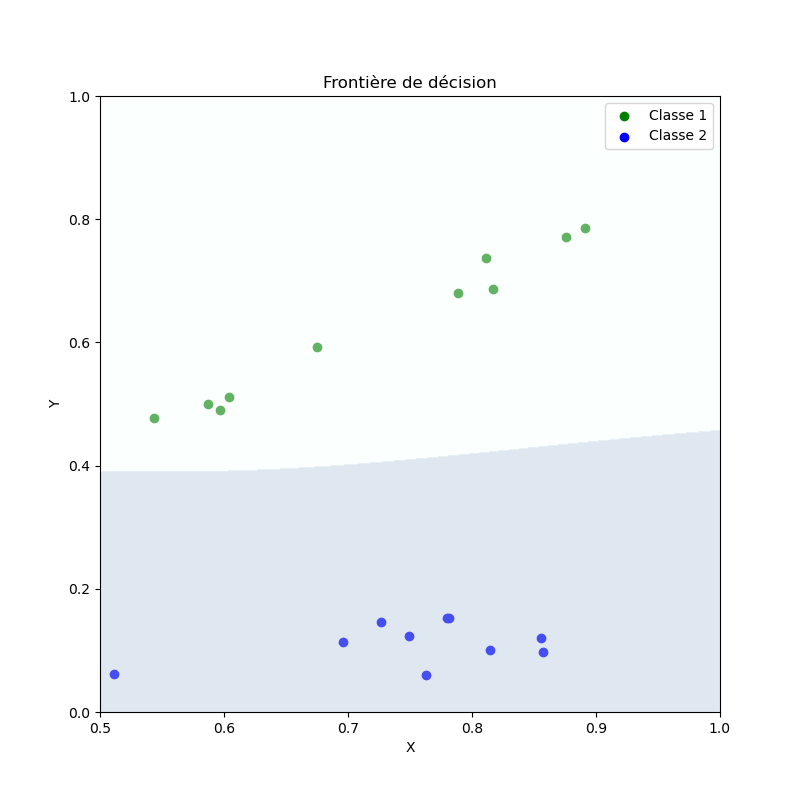

In [11]:
plotKDEdecision(kde1,kde2,Xtest1,Xtest2,x_min=0.5, y_min=0)

### A Faire :

Reprendre l'exercice avec le dataset2 et essayez d'obtenir les meilleurs résultats possibles sur ce dataset